<a href="https://colab.research.google.com/github/salma71/COVID_LA/blob/salma/data_expolration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# COVID-19 cases per county in CA
import pandas as pd
from pandas import set_option

url = 'https://data.chhs.ca.gov/dataset/6882c390-b2d7-4b9a-aefa-2068cee63e47/resource/6cd8d424-dfaa-4bdd-9410-a3d656e1176e/download/covid19data.csv'  
tot_cases = pd.read_csv(url, parse_dates=True)
with pd.option_context('display.max_columns', None):
  display(tot_cases.head())
tot_cases['month'] = pd.DatetimeIndex(tot_cases['Most Recent Date']).month
tot_cases['day'] = pd.DatetimeIndex(tot_cases['Most Recent Date']).day
tot_cases['year'] = pd.DatetimeIndex(tot_cases['Most Recent Date']).year
with pd.option_context('display.max_columns', None):
  display(tot_cases.head())

display(tot_cases[['County Name']].describe())

,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Los Angeles,4/1/2020,3502.0,66.0,739.0,1332.0,335.0,220.0
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0
2,Orange,4/1/2020,579.0,11.0,117.0,221.0,50.0,48.0
3,Riverside,4/1/2020,306.0,11.0,85.0,182.0,29.0,47.0
4,Sacramento,4/1/2020,299.0,8.0,53.0,138.0,20.0,33.0


,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,month,day,year
0,Los Angeles,4/1/2020,3502.0,66.0,739.0,1332.0,335.0,220.0,4,1,2020
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0,4,1,2020
2,Orange,4/1/2020,579.0,11.0,117.0,221.0,50.0,48.0,4,1,2020
3,Riverside,4/1/2020,306.0,11.0,85.0,182.0,29.0,47.0,4,1,2020
4,Sacramento,4/1/2020,299.0,8.0,53.0,138.0,20.0,33.0,4,1,2020


,County Name
count,3598
unique,59
top,Unassigned
freq,61


In [0]:
# url_2 =  'https://raw.githubusercontent.com/salma71/COVID_LA/salma/datasets/COVID19_by_Neighborhood.csv'
# by_neighbour = pd.read_csv(url_2)
# with pd.option_context('display.max_columns', None):
#   display(by_neighbour)

# testing and tot_cases have date as common column
# To do:  
* Need to parse date to match in both tables.

In [3]:
import numpy as np
nyt_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
by_county = pd.read_csv(nyt_url, dtype={'fips': str})
display(by_county.head(10))
by_county.dtypes

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
5,2020-01-25,Orange,California,06059,1,0
6,2020-01-25,Cook,Illinois,17031,1,0
7,2020-01-25,Snohomish,Washington,53061,1,0
8,2020-01-26,Maricopa,Arizona,04013,1,0
9,2020-01-26,Los Angeles,California,06037,1,0


date      object
county    object
state     object
fips      object
cases      int64
deaths     int64
dtype: object

In [4]:
cases_by_county = by_county.loc[by_county['state'] == 'California']
display(cases_by_county.head())
cases_by_county.shape

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,06059,1,0
9,2020-01-26,Los Angeles,California,06037,1,0
10,2020-01-26,Orange,California,06059,1,0
14,2020-01-27,Los Angeles,California,06037,1,0
15,2020-01-27,Orange,California,06059,1,0


(4457, 6)

In [5]:
import datetime
cases_by_county['month'] = pd.DatetimeIndex(cases_by_county['date']).month
cases_by_county['day'] = pd.DatetimeIndex(cases_by_county['date']).day
cases_by_county['year'] = pd.DatetimeIndex(cases_by_county['date']).year
cases_by_county.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,date,county,state,fips,cases,deaths,month,day,year
5,2020-01-25,Orange,California,06059,1,0,1,25,2020
9,2020-01-26,Los Angeles,California,06037,1,0,1,26,2020
10,2020-01-26,Orange,California,06059,1,0,1,26,2020
14,2020-01-27,Los Angeles,California,06037,1,0,1,27,2020
15,2020-01-27,Orange,California,06059,1,0,1,27,2020


In [6]:
set_option('display.max_rows',  None)
group_cases = cases_by_county.groupby(['month', 'county'], as_index=False)['cases', 'deaths'].sum()
display(group_cases.head())
print(group_cases.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,month,county,cases,deaths
0,1,Los Angeles,6,0
1,1,Orange,7,0
2,1,Santa Clara,1,0
3,2,Humboldt,10,0
4,2,Los Angeles,29,0


(179, 4)


In [7]:
census_url = 'https://raw.githubusercontent.com/salma71/COVID_LA/salma/datasets/2010_Census_Populations_by_Zip_Code.csv'
census_pop = pd.read_csv(census_url)
display(census_pop.head())
census_pop.shape

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


(319, 7)

In [8]:
!pip install -q uszipcode

     |████████████████████████████████| 378kB 3.3MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 122kB 10.6MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 


In [0]:
# pd.DataFrame(census_pop.iloc[:,0])

In [10]:
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)
# iterate over the zip codes and extract the county name
zipy_code = census_pop.iloc[:,0].values
county = pd.DataFrame()
city = pd.DataFrame()
for i in zipy_code:
  temp_1 = pd.DataFrame(np.array((search.by_zipcode(i).county).split(',')))
  temp_2 = pd.DataFrame(np.array((search.by_zipcode(i).city).split(',')))
  county =  county.append(temp_1, ignore_index = True)
  city = city.append(temp_2, ignore_index = True)
# rename the column
county.rename(columns={0: 'county'}, inplace=True)
city.rename(columns = {0: 'city'}, inplace=True)
# concat with the census_pop
census = pd.concat([census_pop, county, city],axis=1, join='inner')

census.shape


Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


(319, 9)

In [11]:
# remove County word from county name

census['county'] = census['county'].str.replace('County', '')
census.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,county,city
0,91371,1,73.5,0,1,1,1.00,Los Angeles,Woodland Hills
1,90001,57110,26.6,28468,28642,12971,4.40,Los Angeles,Los Angeles
2,90002,51223,25.5,24876,26347,11731,4.36,Los Angeles,Los Angeles
3,90003,66266,26.3,32631,33635,15642,4.22,Los Angeles,Los Angeles
4,90004,62180,34.8,31302,30878,22547,2.73,Los Angeles,Los Angeles


In [12]:
df1 = census.drop(columns='Zip Code')
# df1 = df1.groupby(['city', 'county'], as_index=False)['Total Population'].sum()
display(df1.head())
print(df1.shape)
# tot = df1.merge(group_cases,how='left', left_on='county', right_on='county')

# tot

,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,county,city
0,1,73.5,0,1,1,1.00,Los Angeles,Woodland Hills
1,57110,26.6,28468,28642,12971,4.40,Los Angeles,Los Angeles
2,51223,25.5,24876,26347,11731,4.36,Los Angeles,Los Angeles
3,66266,26.3,32631,33635,15642,4.22,Los Angeles,Los Angeles
4,62180,34.8,31302,30878,22547,2.73,Los Angeles,Los Angeles


(319, 8)


In [13]:
ces_data = 'https://raw.githubusercontent.com/salma71/COVID_LA/salma/datasets/asthma_by_age.csv'
col_list = ['ZIP', 'California County', 'Traffic', 'Asthma']
asthma_by_age = pd.read_csv(ces_data, usecols=col_list, na_values=np.nan)
display(asthma_by_age.head())
asthma_by_age.shape

,California County,ZIP,Traffic,Asthma
0,Fresno,93706,909.14,131.64
1,San Bernardino,91761,782.26,60.66
2,Fresno,93706,576.52,142.12
3,San Joaquin,95203,1305.01,142.17
4,Fresno,93725,435.16,90.48


(16179, 4)

In [14]:
tot_cases.head()

,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,month,day,year
0,Los Angeles,4/1/2020,3502.0,66.0,739.0,1332.0,335.0,220.0,4,1,2020
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0,4,1,2020
2,Orange,4/1/2020,579.0,11.0,117.0,221.0,50.0,48.0,4,1,2020
3,Riverside,4/1/2020,306.0,11.0,85.0,182.0,29.0,47.0,4,1,2020
4,Sacramento,4/1/2020,299.0,8.0,53.0,138.0,20.0,33.0,4,1,2020


In [0]:
# rename columns - easy merging
tot_cases = tot_cases.rename(columns={'County Name': 'county', 'Total Count Deaths': 'death'})
census = census.rename(columns={'Zip Code': 'ZIP', 'Total Population': 'population'})
cases_by_county = cases_by_county.drop(columns=['fips', 'date'])
asthma_by_age = asthma_by_age.rename(columns={'California County': 'county'})


In [16]:
# get the unique values from summary statistics to count the counties.
display(tot_cases[['county']].describe())
display(census[['county', 'city']].describe())
display(cases_by_county[['county']].describe())
display(asthma_by_age[['county']].describe())

,county
count,3598
unique,59
top,Unassigned
freq,61


,county,city
count,319,319
unique,5,155
top,Los Angeles,Los Angeles
freq,290,65


,county
count,4457
unique,59
top,Orange
freq,128


,county
count,16012
unique,7999
top,Los Angeles
freq,2343


In [17]:
display(tot_cases.head())
display(census.head())
display(cases_by_county.head())
display(asthma_by_age.head())

,county,Most Recent Date,Total Count Confirmed,death,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,month,day,year
0,Los Angeles,4/1/2020,3502.0,66.0,739.0,1332.0,335.0,220.0,4,1,2020
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0,4,1,2020
2,Orange,4/1/2020,579.0,11.0,117.0,221.0,50.0,48.0,4,1,2020
3,Riverside,4/1/2020,306.0,11.0,85.0,182.0,29.0,47.0,4,1,2020
4,Sacramento,4/1/2020,299.0,8.0,53.0,138.0,20.0,33.0,4,1,2020


,ZIP,population,Median Age,Total Males,Total Females,Total Households,Average Household Size,county,city
0,91371,1,73.5,0,1,1,1.00,Los Angeles,Woodland Hills
1,90001,57110,26.6,28468,28642,12971,4.40,Los Angeles,Los Angeles
2,90002,51223,25.5,24876,26347,11731,4.36,Los Angeles,Los Angeles
3,90003,66266,26.3,32631,33635,15642,4.22,Los Angeles,Los Angeles
4,90004,62180,34.8,31302,30878,22547,2.73,Los Angeles,Los Angeles


,county,state,cases,deaths,month,day,year
5,Orange,California,1,0,1,25,2020
9,Los Angeles,California,1,0,1,26,2020
10,Orange,California,1,0,1,26,2020
14,Los Angeles,California,1,0,1,27,2020
15,Orange,California,1,0,1,27,2020


,county,ZIP,Traffic,Asthma
0,Fresno,93706,909.14,131.64
1,San Bernardino,91761,782.26,60.66
2,Fresno,93706,576.52,142.12
3,San Joaquin,95203,1305.01,142.17
4,Fresno,93725,435.16,90.48


In [52]:
# filter the counties to match the other dataframes  -  take the min counties, which is 56
# inner merge cases_by county and total_cases on county, month, day, year, 1, 3
merge_inner = pd.merge(left=cases_by_county, right= tot_cases, how='inner', left_on=['county', 'month', 'day','year'], right_on=['county', 'month', 'day', 'year']) 
merge_inner = merge_inner.drop(columns = 'Most Recent Date')
display(merge_inner.head())
merge_inner.shape
missing_percentage(merge_inner)

,county,state,cases,deaths,month,day,year,Total Count Confirmed,death,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Alameda,California,380,8,4,1,2020,287.0,8.0,52.0,76.0,27.0,15.0
1,Alpine,California,1,0,4,1,2020,1.0,0.0,NaN,NaN,NaN,NaN
2,Amador,California,2,0,4,1,2020,1.0,0.0,0.0,3.0,0.0,0.0
3,Butte,California,8,0,4,1,2020,6.0,0.0,5.0,33.0,2.0,4.0
4,Calaveras,California,3,0,4,1,2020,3.0,0.0,0.0,1.0,0.0,0.0


,Total,Percent
ICU COVID-19 Suspected Patients,15,0.45
ICU COVID-19 Positive Patients,15,0.45
Suspected COVID-19 Positive Patients,9,0.27
COVID-19 Positive Patients,9,0.27


In [55]:
# merge with the asthma by age
try_merge = pd.merge(left=merge_inner, right=asthma_by_age, how='inner', left_on='county', right_on='county')
display(try_merge.head())
display(missing_percentage(try_merge))
try_merge.shape

,county,state,cases,deaths,month,day,year,Total Count Confirmed,death,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,ZIP,Traffic,Asthma
0,Contra Costa,California,250,3,4,1,2020,267.0,3.0,31.0,42.0,12.0,12.0,94804,424.60,160.81
1,Contra Costa,California,250,3,4,1,2020,267.0,3.0,31.0,42.0,12.0,12.0,94565,1192.72,150.18
2,Contra Costa,California,250,3,4,1,2020,267.0,3.0,31.0,42.0,12.0,12.0,94801,302.07,195.32
3,Contra Costa,California,250,3,4,1,2020,267.0,3.0,31.0,42.0,12.0,12.0,94801,231.80,201.52
4,Contra Costa,California,250,3,4,1,2020,267.0,3.0,31.0,42.0,12.0,12.0,94804,1651.56,145.90


,Total,Percent
Traffic,1891,0.66


(284436, 16)

In [0]:
# merge_inner_2 = pd.concat([census, asthma_by_age]) 
# display(merge_inner_2.head())
# merge_inner_2.shape

In [0]:
# dataset = pd.concat([merge_inner, merge_inner_2])
# dataset = dataset.drop_duplicates()
# display(dataset.head())
# dataset.shape

In [0]:
try_merge.to_csv('LA_cases_per_county.csv')

In [58]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(try_merge)

,Total,Percent
Traffic,1891,0.66


In [60]:
dataset = try_merge.drop(columns=['ICU COVID-19 Positive Patients', 'ICU COVID-19 Suspected Patients', 'Suspected COVID-19 Positive Patients', 'COVID-19 Positive Patients', 'state', 'Total Count Confirmed', 'year'])
display(dataset.head())
missing_percentage(dataset)
dataset.shape

,county,cases,deaths,month,day,death,ZIP,Traffic,Asthma
0,Contra Costa,250,3,4,1,3.0,94804,424.60,160.81
1,Contra Costa,250,3,4,1,3.0,94565,1192.72,150.18
2,Contra Costa,250,3,4,1,3.0,94801,302.07,195.32
3,Contra Costa,250,3,4,1,3.0,94801,231.80,201.52
4,Contra Costa,250,3,4,1,3.0,94804,1651.56,145.90


(284436, 9)

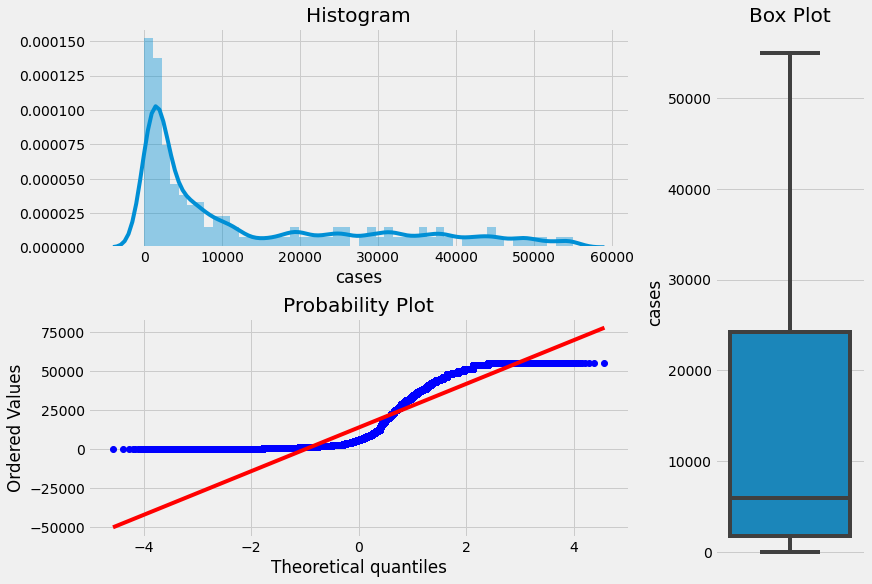

In [62]:
def plotting_3_chart(df, feature):
  ## Importing seaborn, matplotlab and scipy modules. 
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.gridspec as gridspec
  from scipy import stats
  import matplotlib.style as style
  style.use('fivethirtyeight')

  ## Creating a customized chart. and giving in figsize and everything. 
  fig = plt.figure(constrained_layout=True, figsize=(12,8))
  ## creating a grid of 3 cols and 3 rows. 
  grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
  #gs = fig3.add_gridspec(3, 3)

  ## Customizing the histogram grid. 
  ax1 = fig.add_subplot(grid[0, :2])
  ## Set the title. 
  ax1.set_title('Histogram')
  ## plot the histogram. 
  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

  # customizing the QQ_plot. 
  ax2 = fig.add_subplot(grid[1, :2])
  ## Set the title. 
  ax2.set_title('QQ_plot')
  ## Plotting the QQ_Plot. 
  stats.probplot(df.loc[:,feature], plot = ax2)

  ## Customizing the Box Plot. 
  ax3 = fig.add_subplot(grid[:, 2])
  ## Set title. 
  ax3.set_title('Box Plot')
  ## Plotting the box plot. 
  sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

plotting_3_chart(try_merge, 'cases')